In [1]:
import pandas as pd
import Assignment as a
import numpy as np
data = pd.read_csv("data.csv")

C:\Users\alanl\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (12,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Plotting Function

In [2]:
import matplotlib.pyplot as plt
def PlotResults(X,r,algos=["K - Means","Mixture of Gaussians","Birch"],xaxis="xaxis",yaxis="yaxis",fontsize='13'):
    '''
    Plots cluster results
        Parameters:
            X[2xN Matrix]: 2xN Matrix of Datapoints to be plotted
            r[?xN Matrix]: NumClusteringAlgorithmsxN Matrix of Datapoint Assignments from the Clustering Algorithms.
            algos[? indexed array of strings]: Titles for each of the plots based on the clustering algorithms presented.
            xaxis[string]: Label for the x axis
            yaxis[string]: Label for the x axis
        Returns:
            Plotted results of clustering algorithms in 2x[NumclusteringAlgorithms/2] subplot figure with different colors for each cluster
    '''
    
    col = 3
    rows = int(np.ceil(len(r)/col))
    
    K = len(np.unique(r[0]))
    
    fig, axs = plt.subplots(rows, col, figsize=(6*col,5*rows), sharex=True, sharey=True)

    
    for i in range(len(axs)):
        axs[i].set_title(algos[i], fontsize=fontsize)
    
    COLORS = ['r','g','b','m','c','y','k']
    
    for i in range(len(r)):
        colors = None
        colors = np.where(r[i]==0,COLORS[0],'-')
        for k in range(K-1):
            colors[r[i]==k+1] = COLORS[k+1]
        if(rows>1):
            axs[int(i/col),i%col].scatter(X[0], X[1], c=colors)
        else:
            axs[i].scatter(X[0], X[1], c=colors)
    
    # Create common X and Y axis
    fig.add_subplot(111, frame_on=False)
    plt.tick_params(labelcolor="none", bottom=False, left=False)

    plt.xlabel(xaxis, fontsize=fontsize)
    plt.ylabel(yaxis, fontsize=fontsize)

## Testing out the Algo

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


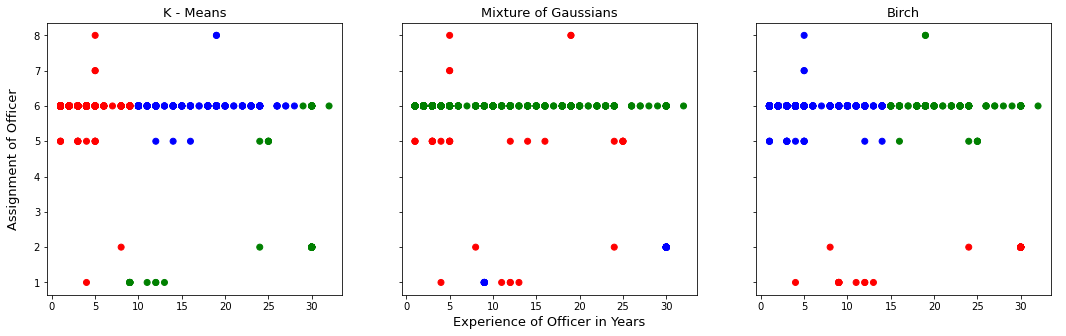

In [3]:
assignmentCol = np.argmax(np.array(pd.get_dummies(data.assignment)),axis=1)
results = a.AssignmentFunction(np.array((data.exp_years[:1000], assignmentCol[:1000])).T,3,2000)  ##(X = data, K = numClusters, maxIters)
PlotResults(np.array((data.exp_years[:1000], assignmentCol[:1000])),results, xaxis="Experience of Officer in Years", yaxis="Assignment of Officer")

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


C:\Users\alanl\miniforge3\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(


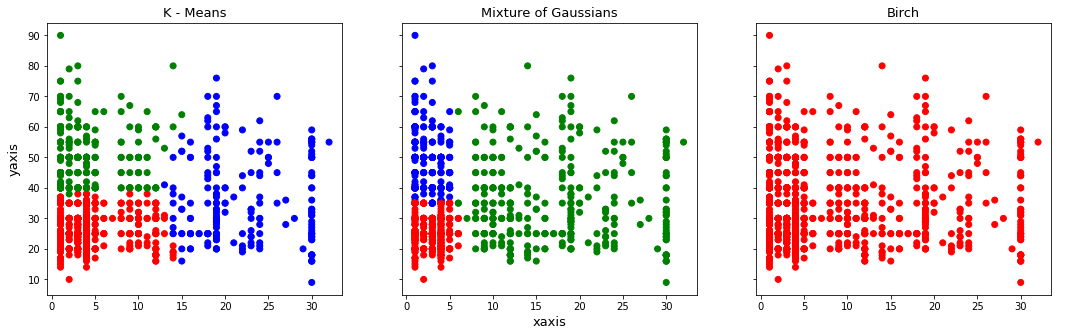

In [4]:
results = a.AssignmentFunction(np.array((data.exp_years[:1000], data.perceived_age[:1000])).T,3,2000)  ##(X = data, K = numClusters, maxIters)
PlotResults(np.array((data.exp_years[:1000], data.perceived_age[:1000])),results)

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


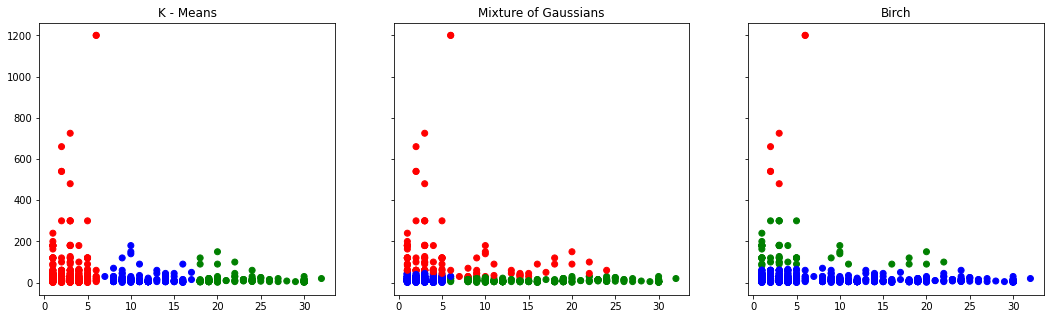

In [50]:
results = a.AssignmentFunction(np.array((data.exp_years[:1000], data.stopduration[:1000])).T,3,2000)  ##(X = data, K = numClusters, maxIters)
PlotResults(np.array((data.exp_years[:1000], data.stopduration[:1000])),results)

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


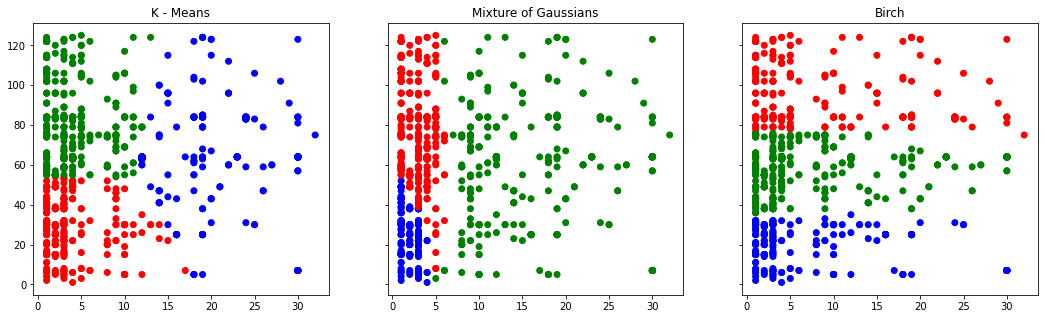

In [51]:
beatCol = np.argmax(np.array(pd.get_dummies(data.beat_name)),axis=1)
results = a.AssignmentFunction(np.array((data.exp_years[:1000], beatCol[:1000])).T,3,2000)  ##(X = data, K = numClusters, maxIters)
PlotResults(np.array((data.exp_years[:1000], beatCol[:1000])),results)

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


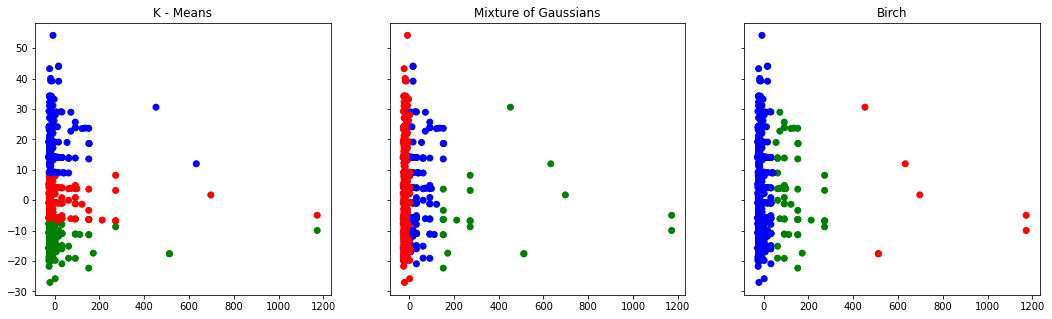

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_Data = pca.fit_transform(np.array((data.exp_years[:1000], data.stopduration[:1000],data.perceived_age[:1000],assignmentCol[:1000])).T)
results = a.AssignmentFunction(new_Data,3,2000)  ##(X = data, K = numClusters, maxIters)
PlotResults(new_Data.T,results)

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


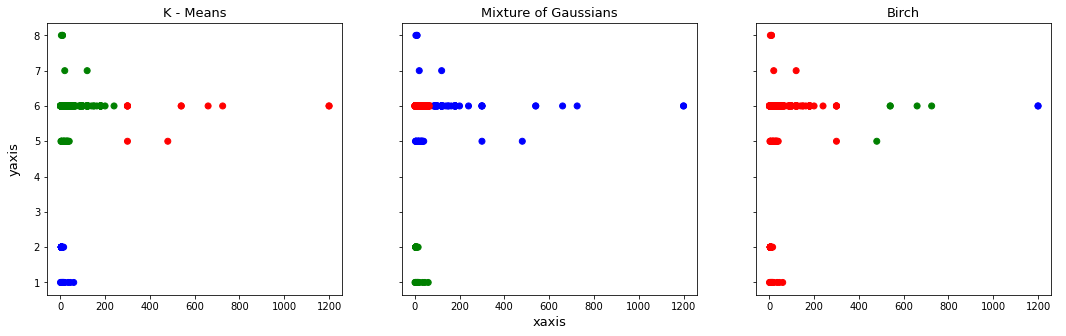

In [91]:
results = a.AssignmentFunction(np.array((data.stopduration[:1000], assignmentCol[:1000])).T,3,2000)  ##(X = data, K = numClusters, maxIters)
PlotResults(np.array((data.stopduration[:1000], assignmentCol[:1000])),results)

## Looking deeper into a specific set of data to report on for project

In [5]:
subset = np.array((data.exp_years, data.stopduration)).T

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


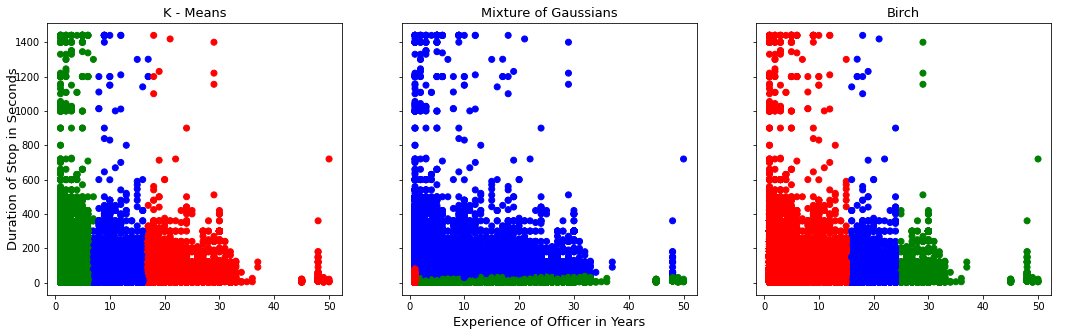

In [8]:
results = a.AssignmentFunction(subset,3,2000)  ##(X = data, K = numClusters, maxIters)
PlotResults(subset.T,results,xaxis="Experience of Officer in Years",yaxis="Duration of Stop in Seconds")

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


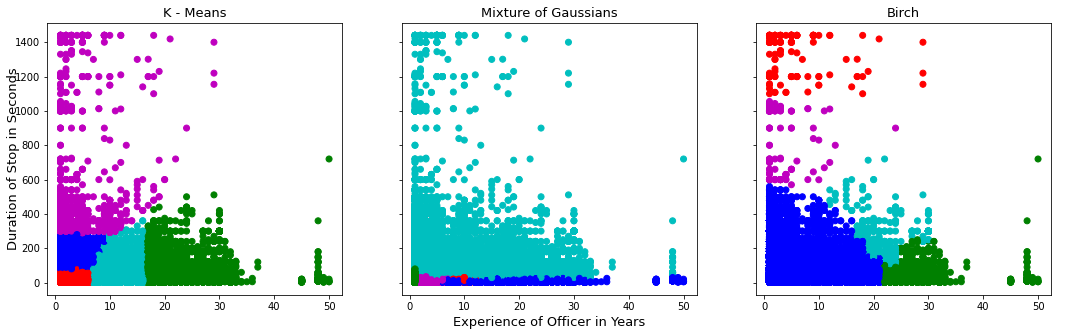

In [6]:
results = a.AssignmentFunction(subset,5,2000)  ##(X = data, K = numClusters, maxIters)
PlotResults(subset.T,results,xaxis="Experience of Officer in Years",yaxis="Duration of Stop in Seconds")

Fitting Kmeans
Converged!
Fitting MOG
Fitting Birch


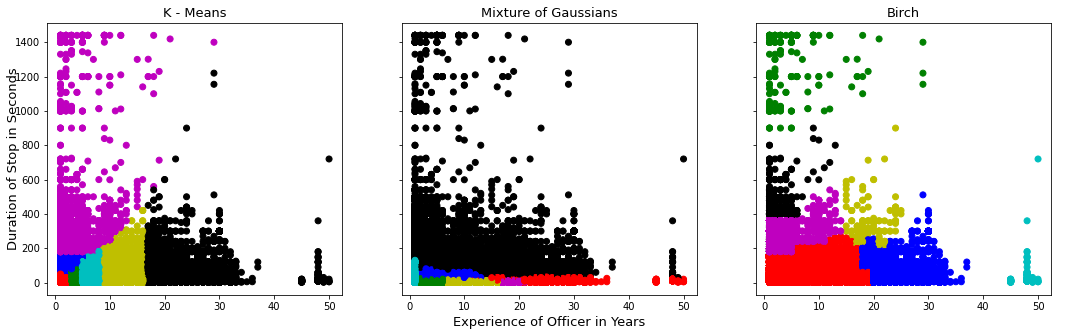

In [7]:
results = a.AssignmentFunction(subset,7,2000)  ##(X = data, K = numClusters, maxIters)
PlotResults(subset.T,results,xaxis="Experience of Officer in Years",yaxis="Duration of Stop in Seconds")